## 1. Import required libraries and read the dataset.

In [3]:
import pandas as pd
import numpy as np

In [4]:
play = pd.read_csv(r"E:\GLCA_AUG_2023\Python_Files\python project\project_4\Apps_data+(1).csv")

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [5]:
play.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
play.shape

(10841, 13)

In [7]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
play.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
play.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

## 4. Check if there are any duplicate records in the dataset? if any drop them.

In [10]:
play[play.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
play.drop_duplicates(inplace=True)

In [12]:
play[play.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [13]:
play.drop(play.query("Category == '1.9'").index , inplace= True)

In [14]:
play.Category.unique()


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
play[play.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low).

In [16]:
play.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
play.replace(" ", np.nan, inplace = True)

In [18]:
play.dropna(inplace=True)

In [19]:
play[play.Rating == ' ']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [20]:
play["Rating_Category"] = play.Rating.apply(lambda x: "High" if x > 3.5 else "LOW")

In [21]:
play.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High


## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [22]:
play.Rating_Category.unique()

array(['High', 'LOW'], dtype=object)

In [23]:
play.Rating_Category.value_counts()

High    8007
LOW      879
Name: Rating_Category, dtype: int64

In [24]:
#There are 8007 ratings which are greater than 3.5 ratings given by custemors 
#and 879 low rating which are below 3.5 given by customers 

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [25]:
play["Reviews"] = play["Reviews"].astype(int)

In [26]:
play.Reviews.dtype

dtype('int32')

<AxesSubplot:>

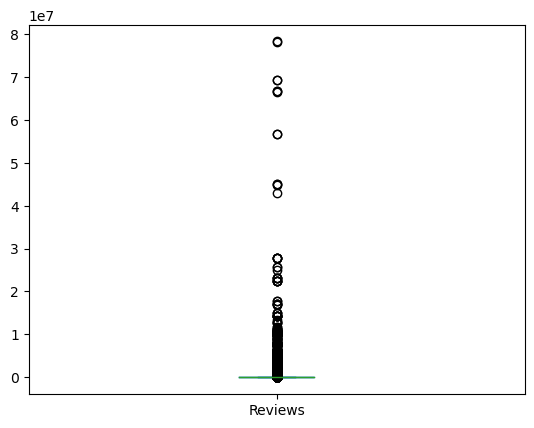

In [27]:
play.Reviews.plot(kind="box")

In [28]:
play["Reviews"] = np.log10(play["Reviews"])

In [29]:
play.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
5,Paper flowers instructions,ART_AND_DESIGN,4.4,2.222716,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,2.250420,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High
7,Infinite Painter,ART_AND_DESIGN,4.1,4.566025,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High
8,Garden Coloring Book,ART_AND_DESIGN,4.4,4.139596,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,2.082785,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High


<AxesSubplot:>

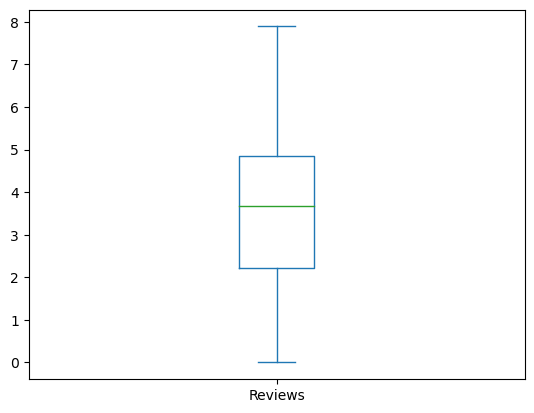

In [30]:
play.Reviews.plot(kind="box")

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')


In [31]:
play.Size.dtype

dtype('O')

In [32]:
play["Size"] = play["Size"].str.replace("M",'000000')

In [33]:
play["Size"] = play["Size"].str.replace("k",'000')

In [34]:
play

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,0.845098,2.6000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,High
10836,Sya9a Maroc - FR,FAMILY,4.5,1.579784,53000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,0.602060,3.6000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,High
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,2.056905,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High


In [35]:
play.drop(play.query("Size == 'Varies with device'").index , inplace= True)

In [36]:
play["Size"] = play["Size"].astype(float)

In [37]:
play.Size.dtype

dtype('float64')

In [38]:
play.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
5,Paper flowers instructions,ART_AND_DESIGN,4.4,2.222716,5.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,2.250420,19000000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High
7,Infinite Painter,ART_AND_DESIGN,4.1,4.566025,29000000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High
8,Garden Coloring Book,ART_AND_DESIGN,4.4,4.139596,33000000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,2.082785,3.1,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High


## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [39]:
play["Installs"] = play.Installs.str.replace(",",'')
play["Installs"] = play.Installs.str.replace("+",'')

C:\Users\Jameer_Ibn_Hasan\AppData\Local\Temp\ipykernel_1692\720675110.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play["Installs"] = play.Installs.str.replace("+",'')


In [40]:
play.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High
5,Paper flowers instructions,ART_AND_DESIGN,4.4,2.222716,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,High
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,2.250420,19000000.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,High
7,Infinite Painter,ART_AND_DESIGN,4.1,4.566025,29000000.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,High
8,Garden Coloring Book,ART_AND_DESIGN,4.4,4.139596,33000000.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,High
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,2.082785,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,High


In [41]:
play["Installs"] = play["Installs"].astype(int)

In [42]:
play.Installs.dtype

dtype('int32')

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [43]:
play.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [44]:
play["Price"] = play["Price"].str.replace("$",'')

C:\Users\Jameer_Ibn_Hasan\AppData\Local\Temp\ipykernel_1692\3473589712.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play["Price"] = play["Price"].str.replace("$",'')


In [45]:
play["Price"] = play["Price"].astype(float)

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [46]:
play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,2.201397,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,2.985426,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,4.942058,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,5.333737,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,2.985426,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [47]:
play.drop(['App','Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'], axis=1,inplace=True)

In [48]:
play.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,ART_AND_DESIGN,2.201397,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,4.942058,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,2.985426,2.8,100000,Free,0.0,Everyone,High


In [49]:
play.nunique()

Category             33
Reviews            4669
Size                411
Installs             19
Type                  2
Price                68
Content Rating        6
Rating_Category       2
dtype: int64

## 13. Encode the categorical columns.


In [50]:
play.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,ART_AND_DESIGN,2.201397,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,2.985426,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,4.942058,8.7,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,5.333737,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,2.985426,2.8,100000,Free,0.0,Everyone,High


In [53]:
play1 = pd.get_dummies(play,columns=["Category", "Content Rating"])

In [54]:
play1.head()

,Reviews,Size,Installs,Type,Price,Rating_Category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,2.201397,19000000.0,10000,Free,0.0,High,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.985426,14000000.0,500000,Free,0.0,High,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.942058,8.7,5000000,Free,0.0,High,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.333737,25000000.0,50000000,Free,0.0,High,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.985426,2.8,100000,Free,0.0,High,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
LEncoder = LabelEncoder()

In [59]:
play1["Type"] = LEncoder.fit_transform(play1["Type"])

In [61]:
play1["Rating_Category"] = LEncoder.fit_transform(play1["Rating_Category"])

In [63]:
play1.head()

,Reviews,Size,Installs,Type,Price,Rating_Category,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,2.201397,19000000.0,10000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.985426,14000000.0,500000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.942058,8.7,5000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5.333737,25000000.0,50000000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.985426,2.8,100000,0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [65]:
from sklearn.model_selection import train_test_split as tts

In [73]:
x = play1.drop(["Rating_Category"], axis=1)


In [75]:
y = play1[["Rating_Category"]]

## 15. Split the dataset into train and test.


In [76]:
x_train, x_test, y_train, y_test = tts(x,y, random_state=1, test_size=0.20)

## 16. Standardize the data, so that the values are within a particular range.


In [81]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [82]:
data = scale.fit_transform(play1)

In [84]:
standard = pd.DataFrame(data, columns=play1.columns)

In [85]:
X =standard.drop(['Rating_Category'], axis=1)

In [86]:
Y = play1[['Rating_Category']]

In [87]:
X_train, X_test, Y_train, Y_test = tts(X,Y, random_state=1, test_size=0.20)

In [88]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

In [89]:
regression_model.fit(X_train, Y_train)

LinearRegression()